In [27]:
import torch
import torchvision

# Download MNIST dataset

train_data = torchvision.datasets.MNIST(root=".", train=True, download=True)
train_test = torchvision.datasets.MNIST(root=".", train=False, download=True)

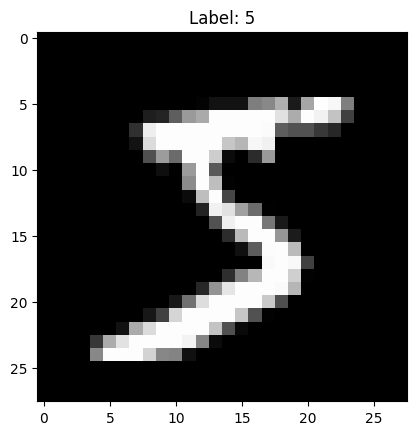

In [28]:
import matplotlib.pyplot as plt
import numpy as np

image, label = train_data[0]
image = np.array(image.convert('L'))

plt.imshow(image, cmap="gray")
plt.title("Label: " + str(label))
plt.show()

In [29]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,),(.5,))
])

train_data = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [30]:
subset_size = 1000  # use only 1000 examples
subset_indices = list(range(subset_size))
subset_sampler = torch.utils.data.SubsetRandomSampler(subset_indices)
subset_dataset = torch.utils.data.Subset(train_data, subset_indices)

# Create a DataLoader for the subset dataset
subset_loader = torch.utils.data.DataLoader(subset_dataset, batch_size=64, sampler=subset_sampler)

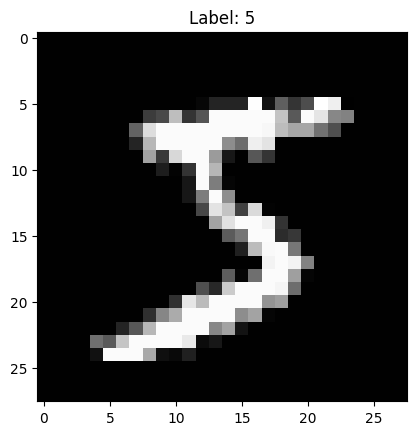

In [31]:
image, label = train_data[0]

to_pil = transforms.ToPILImage()
image = to_pil(image)
image = np.array(image)

plt.title("Label: " + str(label))
plt.imshow(image, cmap = "gray")
plt.show()

In [32]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1,32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64*12*12, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 12 * 12)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x

In [33]:
net = NeuralNet()

optimizer = torch.optim.SGD(net.parameters(), lr = .1)
criterion = nn.CrossEntropyLoss()

In [34]:
num_epochs = 100

for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for input, label in subset_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass, backward pass, and optimize
        output = net(input)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print the epoch loss
    if epoch%10 == 0:
        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch+1} loss: {epoch_loss:.3f}')

print('Finished Training')

Epoch 1 loss: 0.036
Epoch 11 loss: 0.001
Epoch 21 loss: 0.000
Epoch 31 loss: 0.000
Epoch 41 loss: 0.000
Epoch 51 loss: 0.000
Epoch 61 loss: 0.000
Epoch 71 loss: 0.000
Epoch 81 loss: 0.000
Epoch 91 loss: 0.000
Finished Training


In [35]:
# Set up the testing loop
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        # Extract the inputs and labels
        inputs, labels = data

        # Compute the predictions
        outputs = net(inputs)

        # Get the predicted class for each example
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate the number of correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the accuracy
accuracy = 100.0 * correct / total
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 92.16


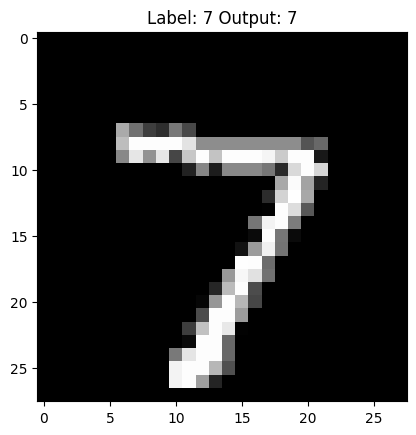

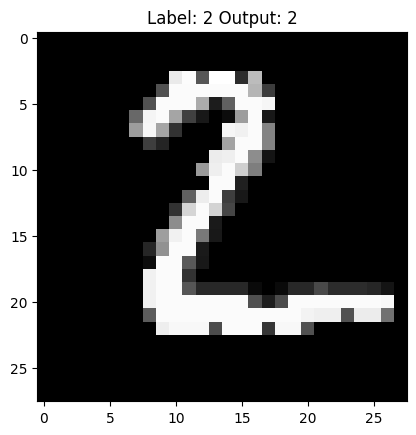

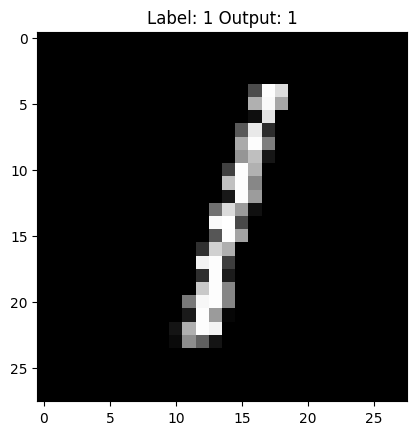

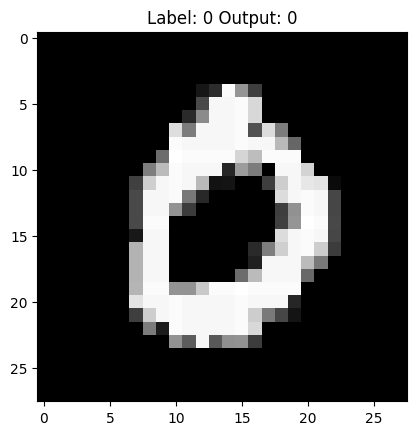

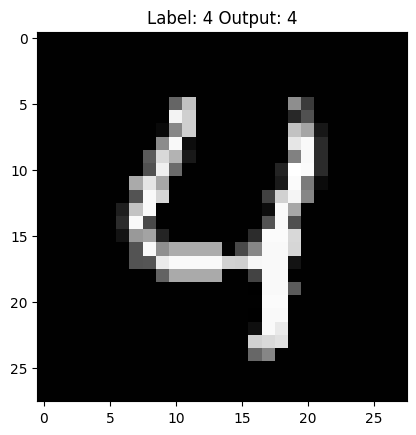

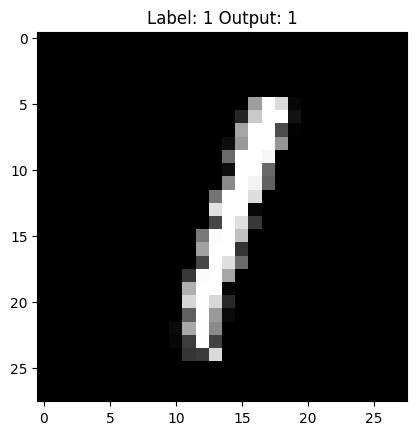

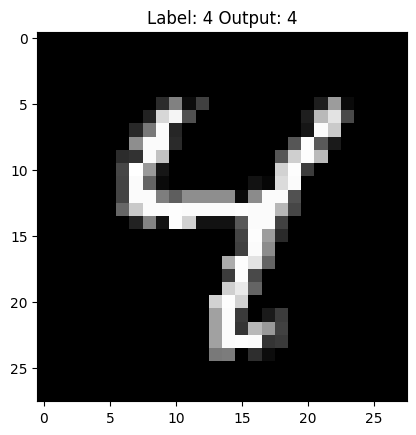

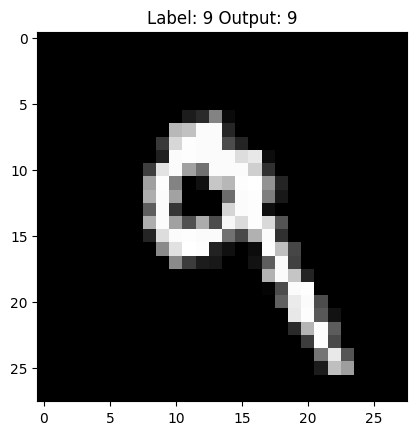

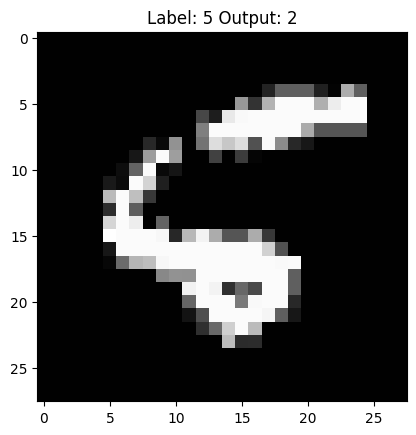

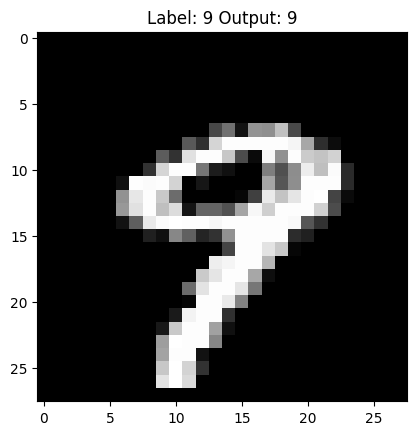

In [48]:
for i in range(10):
    input, label = test_data[i]
    output = net(input)
    _, predicted = torch.max(output.data, 1)
    predicted = predicted.item()

    to_pil = transforms.ToPILImage()
    input = to_pil(input)
    input = np.array(input)

    plt.title("Label: " + str(label) + " Output: " + str(predicted))
    plt.imshow(input, cmap = "gray")
    plt.show()